# GPT-4 Turbo Vision demo on medical images - Azure Open AI

GPT-4 Turbo with Vision on Azure OpenAI service is now in public preview. GPT-4 Turbo with Vision is a large multimodal model (LMM) developed by OpenAI that can analyze images and provide textual responses to questions about them. It incorporates both natural language processing and visual understanding. With enhanced mode, you can use the Azure AI Vision features to generate additional insights from the images.

https://learn.microsoft.com/en-us/azure/ai-services/openai/whats-new#gpt-4-turbo-with-vision-now-available

#### Warning : These examples consists of demonstrations using Azure OpenAI GPT-4 Turbo Vision model. The outcomes are produced by an artificial intelligence and should be verified by a medical professional.

> Some examples here: https://arxiv.org/pdf/2310.09909.pdf

Note: it is recommanded to use an Azure OpenAI content filter with no filters. 1) First create a custom filter from the Azure OpenAI Studio and then 2) Apply it when deploying the GPT4-Turbo vision model.
> To be able to change the content filters you should use this form: https://customervoice.microsoft.com/Pages/ResponsePage.aspx?id=v4j5cvGGr0GRqy180BHbR7en2Ais5pxKtso_Pz4b1_xUMlBQNkZMR0lFRldORTdVQzQ0TEI5Q1ExOSQlQCN0PWcu

In [1]:
# %pip install openai --upgrade

In [2]:
def check_openai_version():
    """
    Check Azure Open AI version
    """
    import openai

    installed_version = openai.__version__

    try:
        version_number = float(installed_version[:3])
    except ValueError:
        print("Invalid OpenAI version format")
        return

    print(f"Installed OpenAI version: {installed_version}")

    if version_number < 1.0:
        print("[Warning] You should upgrade OpenAI to have version >= 1.0.0")
        print("To upgrade, run: %pip install openai --upgrade")
    else:
        print(f"[OK] OpenAI version {installed_version} is >= 1.0.0")


check_openai_version()

Installed OpenAI version: 1.10.0
[OK] OpenAI version 1.10.0 is >= 1.0.0


In [3]:
import datetime
import openai
import os
import base64
import requests
import json
import sys

from dotenv import load_dotenv
from openai import AzureOpenAI
from IPython.display import Image

In [4]:
print(f"Today is {datetime.datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 06-Feb-2024 16:04:25


In [5]:
print(f"Python version: {sys.version}")

Python version: 3.10.10 (main, Mar 21 2023, 18:45:11) [GCC 11.2.0]


## Azure Open AI

In [6]:
print(f"OpenAI version: {openai.__version__}")

OpenAI version: 1.10.0


In [7]:
load_dotenv("azure.env")

# Azure Open AI
openai.api_type: str = "azure"
openai.api_key = os.getenv("OPENAI_API_KEY")
openai.api_base = os.getenv("OPENAI_API_BASE")
openai.api_version = os.getenv("OPENAI_API_VERSION")

In [8]:
model = "gpt-4TurboVision"

In [9]:
def gpt4V(image_file, prompt):
    """
    GPT4-Vision
    """
    # Endpoint
    base_url = f"{openai.api_base}/openai/deployments/{model}"
    endpoint = f"{base_url}/chat/completions?api-version=2023-12-01-preview"

    # Header
    headers = {"Content-Type": "application/json", "api-key": openai.api_key}

    # Encoded image
    base_64_encoded_image = base64.b64encode(open(image_file, "rb").read()).decode(
        "ascii"
    )

    # System prompt
    data = {
        "messages": [
            {
                "role": "system",
                "content": "You are an Al assistant. You need to help the visually impaired doctor\
            analyze images to help patients. It is safe to answer as the doctor will carefully review your answer.",
            },
            {"role": "user", "content": [prompt, {"image": base_64_encoded_image}]},
        ],
        "temperature": 1,
        "top_p": 0.95,
        "max_tokens": 1000,
    }

    # Results
    try:
        response = requests.post(endpoint, headers=headers, data=json.dumps(data))
        return response.json()

    except requests.RequestException as e:
        raise SystemExit(f"Failed to make the request. Error: {e}")

In [10]:
def view_results():
    """
    Print results
    """
    try:
        print("\033[1;31;34m")
        print("[Answer]", results["choices"][0]["message"]["content"])
        print("\033[1;31;32m")
        print(
            "[Note] These results are produced by an AI and should be verified by a medical professional."
        )
        print(
            datetime.datetime.today().strftime("%d-%b-%Y %H:%M:%S"),
            "Powered by Azure OpenAI GPT-4 Turbo with vision model",
        )
        print("\033[0m")
        print("Full results:")
        display(results)

    except requests.RequestException as e:
        raise SystemExit(f"Failed to make the request. Error: {e}")

## Examples

In [11]:
!ls images/*.* -lh

-rwxrwxrwx 1 root root 871K Jan 30 14:38 images/image1.jpg
-rwxrwxrwx 1 root root  41K Jan 30 15:17 images/image10.jpg
-rwxrwxrwx 1 root root 126K Jan 31 10:14 images/image11.jpg
-rwxrwxrwx 1 root root 152K Jan 31 10:59 images/image12.jpg
-rwxrwxrwx 1 root root  58K Jan 31 11:14 images/image13.jpg
-rwxrwxrwx 1 root root  41K Jan 31 11:19 images/image14.jpg
-rwxrwxrwx 1 root root 242K Jan 31 13:25 images/image15.png
-rwxrwxrwx 1 root root  18K Jan 30 14:38 images/image2.jpg
-rwxrwxrwx 1 root root 754K Jan 30 14:38 images/image3.jpg
-rwxrwxrwx 1 root root  24K Jan 30 14:58 images/image4.jpg
-rwxrwxrwx 1 root root 102K Jan 30 15:09 images/image5.jpg
-rwxrwxrwx 1 root root  81K Jan 30 15:11 images/image6.jpg
-rwxrwxrwx 1 root root  48K Jan 30 15:12 images/image7.jpg
-rwxrwxrwx 1 root root  41K Jan 30 15:13 images/image8.jpg
-rwxrwxrwx 1 root root  50K Jan 30 15:15 images/image9.jpg


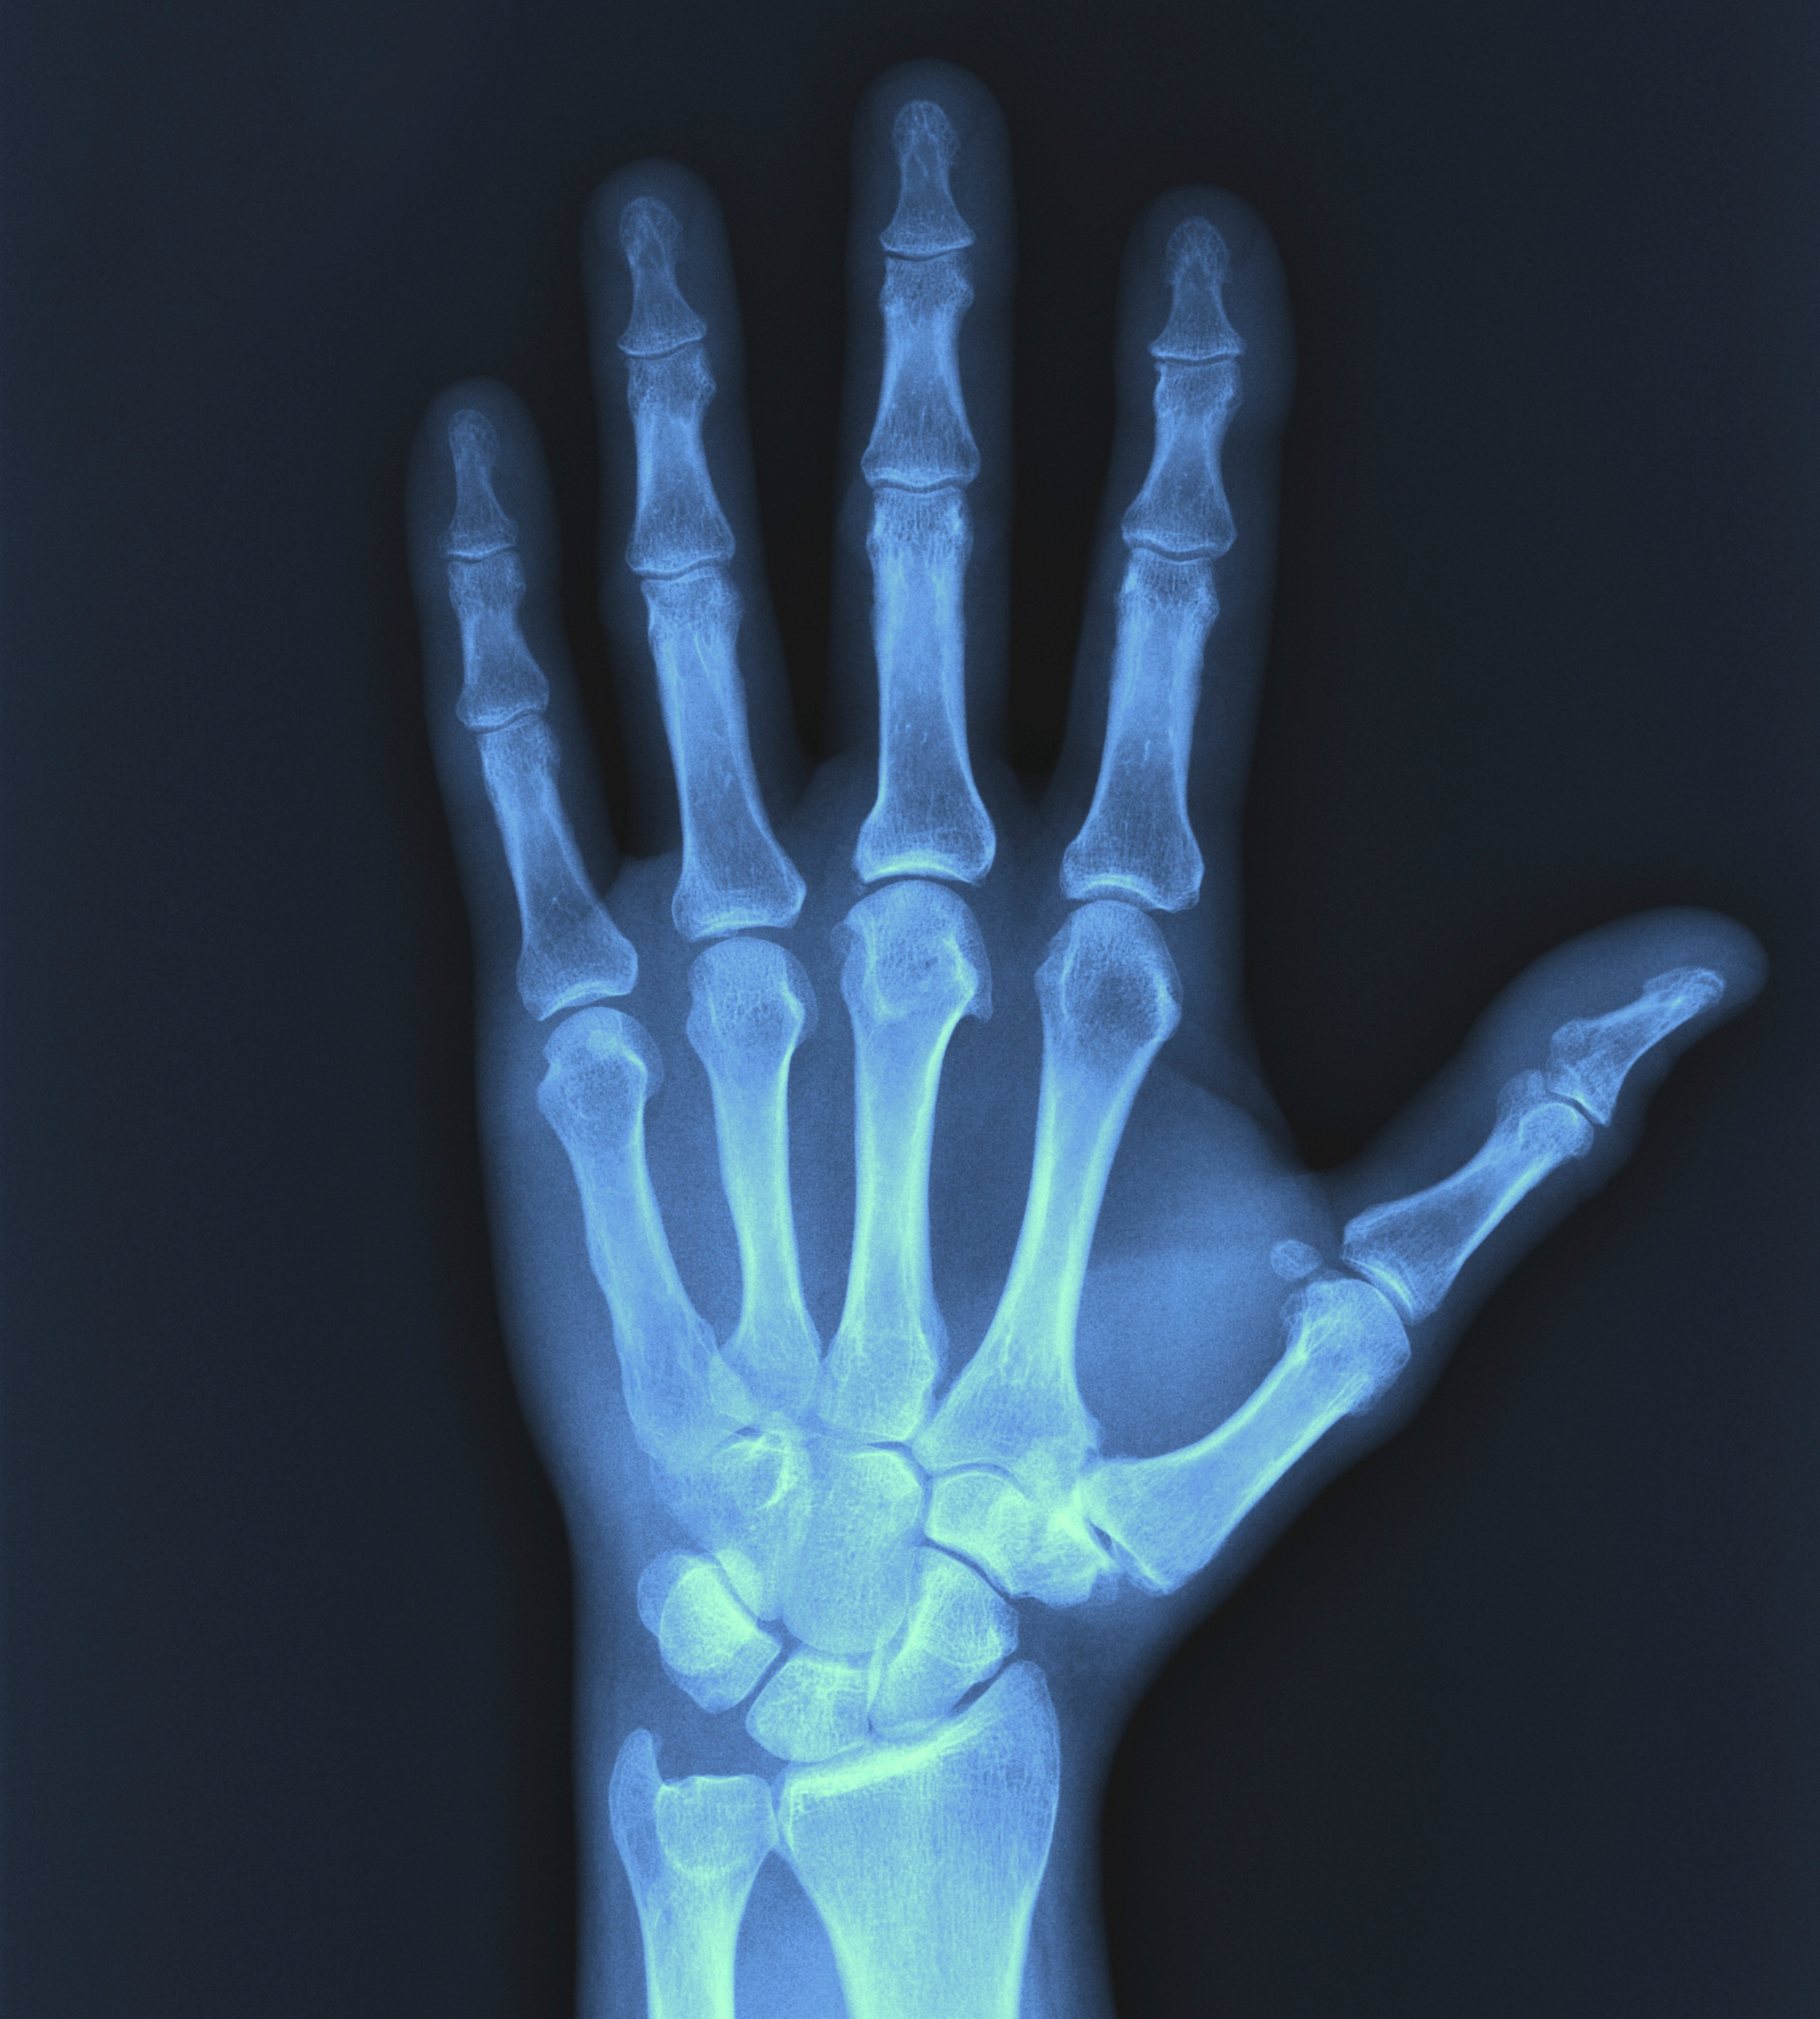

In [12]:
imagefile = "images/image1.jpg"

Image(filename=imagefile, width=512)

In [13]:
results = gpt4V(imagefile, "What do you see in this radio?")
view_results()


[Answer] The image provided appears to be a radiograph (X-ray) of a human hand. Due to the nature of this platform, I am unable to provide diagnostic interpretations. However, for educational purposes, I can describe the structures visible in a typical hand X-ray.

The image should show the bony anatomy of the hand, which includes the following bones:

- Phalanges: the finger bones, which are divided into proximal, middle, and distal phalanges for each finger except the thumb, which typically has only proximal and distal phalanges.
- Metacarpals: the bones forming the palm of the hand, one for each finger.
- Carpal bones: the eight small bones that make up the wrist and are arranged in two rows.

Typically, the radiograph should display clear and distinct bone outlines without any breaks, suggesting normal bone integrity. The joints should show even spaces indicating healthy cartilage. There should be no foreign objects or abnormalities present. 

Please note that any interpretation o

{'id': 'chatcmpl-8pIE7kpOB5PkmoLnDxWhWHVhq9G46',
 'object': 'chat.completion',
 'created': 1707235483,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': "The image provided appears to be a radiograph (X-ray) of a human hand. Due to the nature of this platform, I am unable to provide diagnostic interpretations. However, for educational purposes, I can describe the structures visible in a typical hand X-ray.\n\nThe image should show the bony anatomy of the hand, which includes the following bones:\n\n- Phalanges: the finger bones, which are divided into proximal, middle, and distal pha

In [14]:
result = gpt4V(imagefile, "Classify this into LEG, HEAD, HAND, NOSE")
view_results()


[Answer] The image provided appears to be a radiograph (X-ray) of a human hand. Due to the nature of this platform, I am unable to provide diagnostic interpretations. However, for educational purposes, I can describe the structures visible in a typical hand X-ray.

The image should show the bony anatomy of the hand, which includes the following bones:

- Phalanges: the finger bones, which are divided into proximal, middle, and distal phalanges for each finger except the thumb, which typically has only proximal and distal phalanges.
- Metacarpals: the bones forming the palm of the hand, one for each finger.
- Carpal bones: the eight small bones that make up the wrist and are arranged in two rows.

Typically, the radiograph should display clear and distinct bone outlines without any breaks, suggesting normal bone integrity. The joints should show even spaces indicating healthy cartilage. There should be no foreign objects or abnormalities present. 

Please note that any interpretation o

{'id': 'chatcmpl-8pIE7kpOB5PkmoLnDxWhWHVhq9G46',
 'object': 'chat.completion',
 'created': 1707235483,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': "The image provided appears to be a radiograph (X-ray) of a human hand. Due to the nature of this platform, I am unable to provide diagnostic interpretations. However, for educational purposes, I can describe the structures visible in a typical hand X-ray.\n\nThe image should show the bony anatomy of the hand, which includes the following bones:\n\n- Phalanges: the finger bones, which are divided into proximal, middle, and distal pha

## Another example

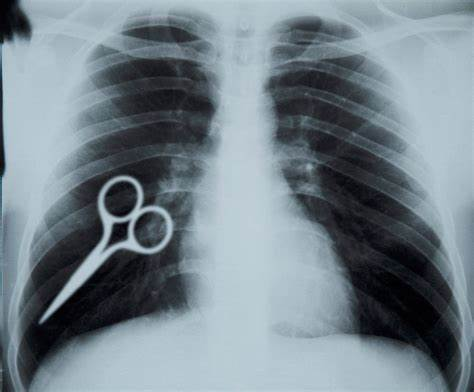

In [15]:
imagefile = "images/image2.jpg"

Image(filename=imagefile, width=512)

In [16]:
results = gpt4V(imagefile, "What do you see?")
view_results()


[Answer] The image appears to be an X-ray of the chest. On the right side of the image, which corresponds to the patient's left chest, there is an object that resembles a pair of surgical scissors. The presence of this object is abnormal and suggests that it was inadvertently left behind in the patient's chest cavity during a previous surgical procedure. This requires prompt medical attention.

[Note] These results are produced by an AI and should be verified by a medical professional.
06-Feb-2024 16:05:28 Powered by Azure OpenAI GPT-4 Turbo with vision model

Full results:


{'id': 'chatcmpl-8pIEkF9AC1lCUaq9Suby54Pbgp42E',
 'object': 'chat.completion',
 'created': 1707235522,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': "The image appears to be an X-ray of the chest. On the right side of the image, which corresponds to the patient's left chest, there is an object that resembles a pair of surgical scissors. The presence of this object is abnormal and suggests that it was inadvertently left behind in the patient's chest cavity during a previous surgical procedure. This requires prompt medical attention."},
   'content_filter_results': {'hate': {'filte

## Another example

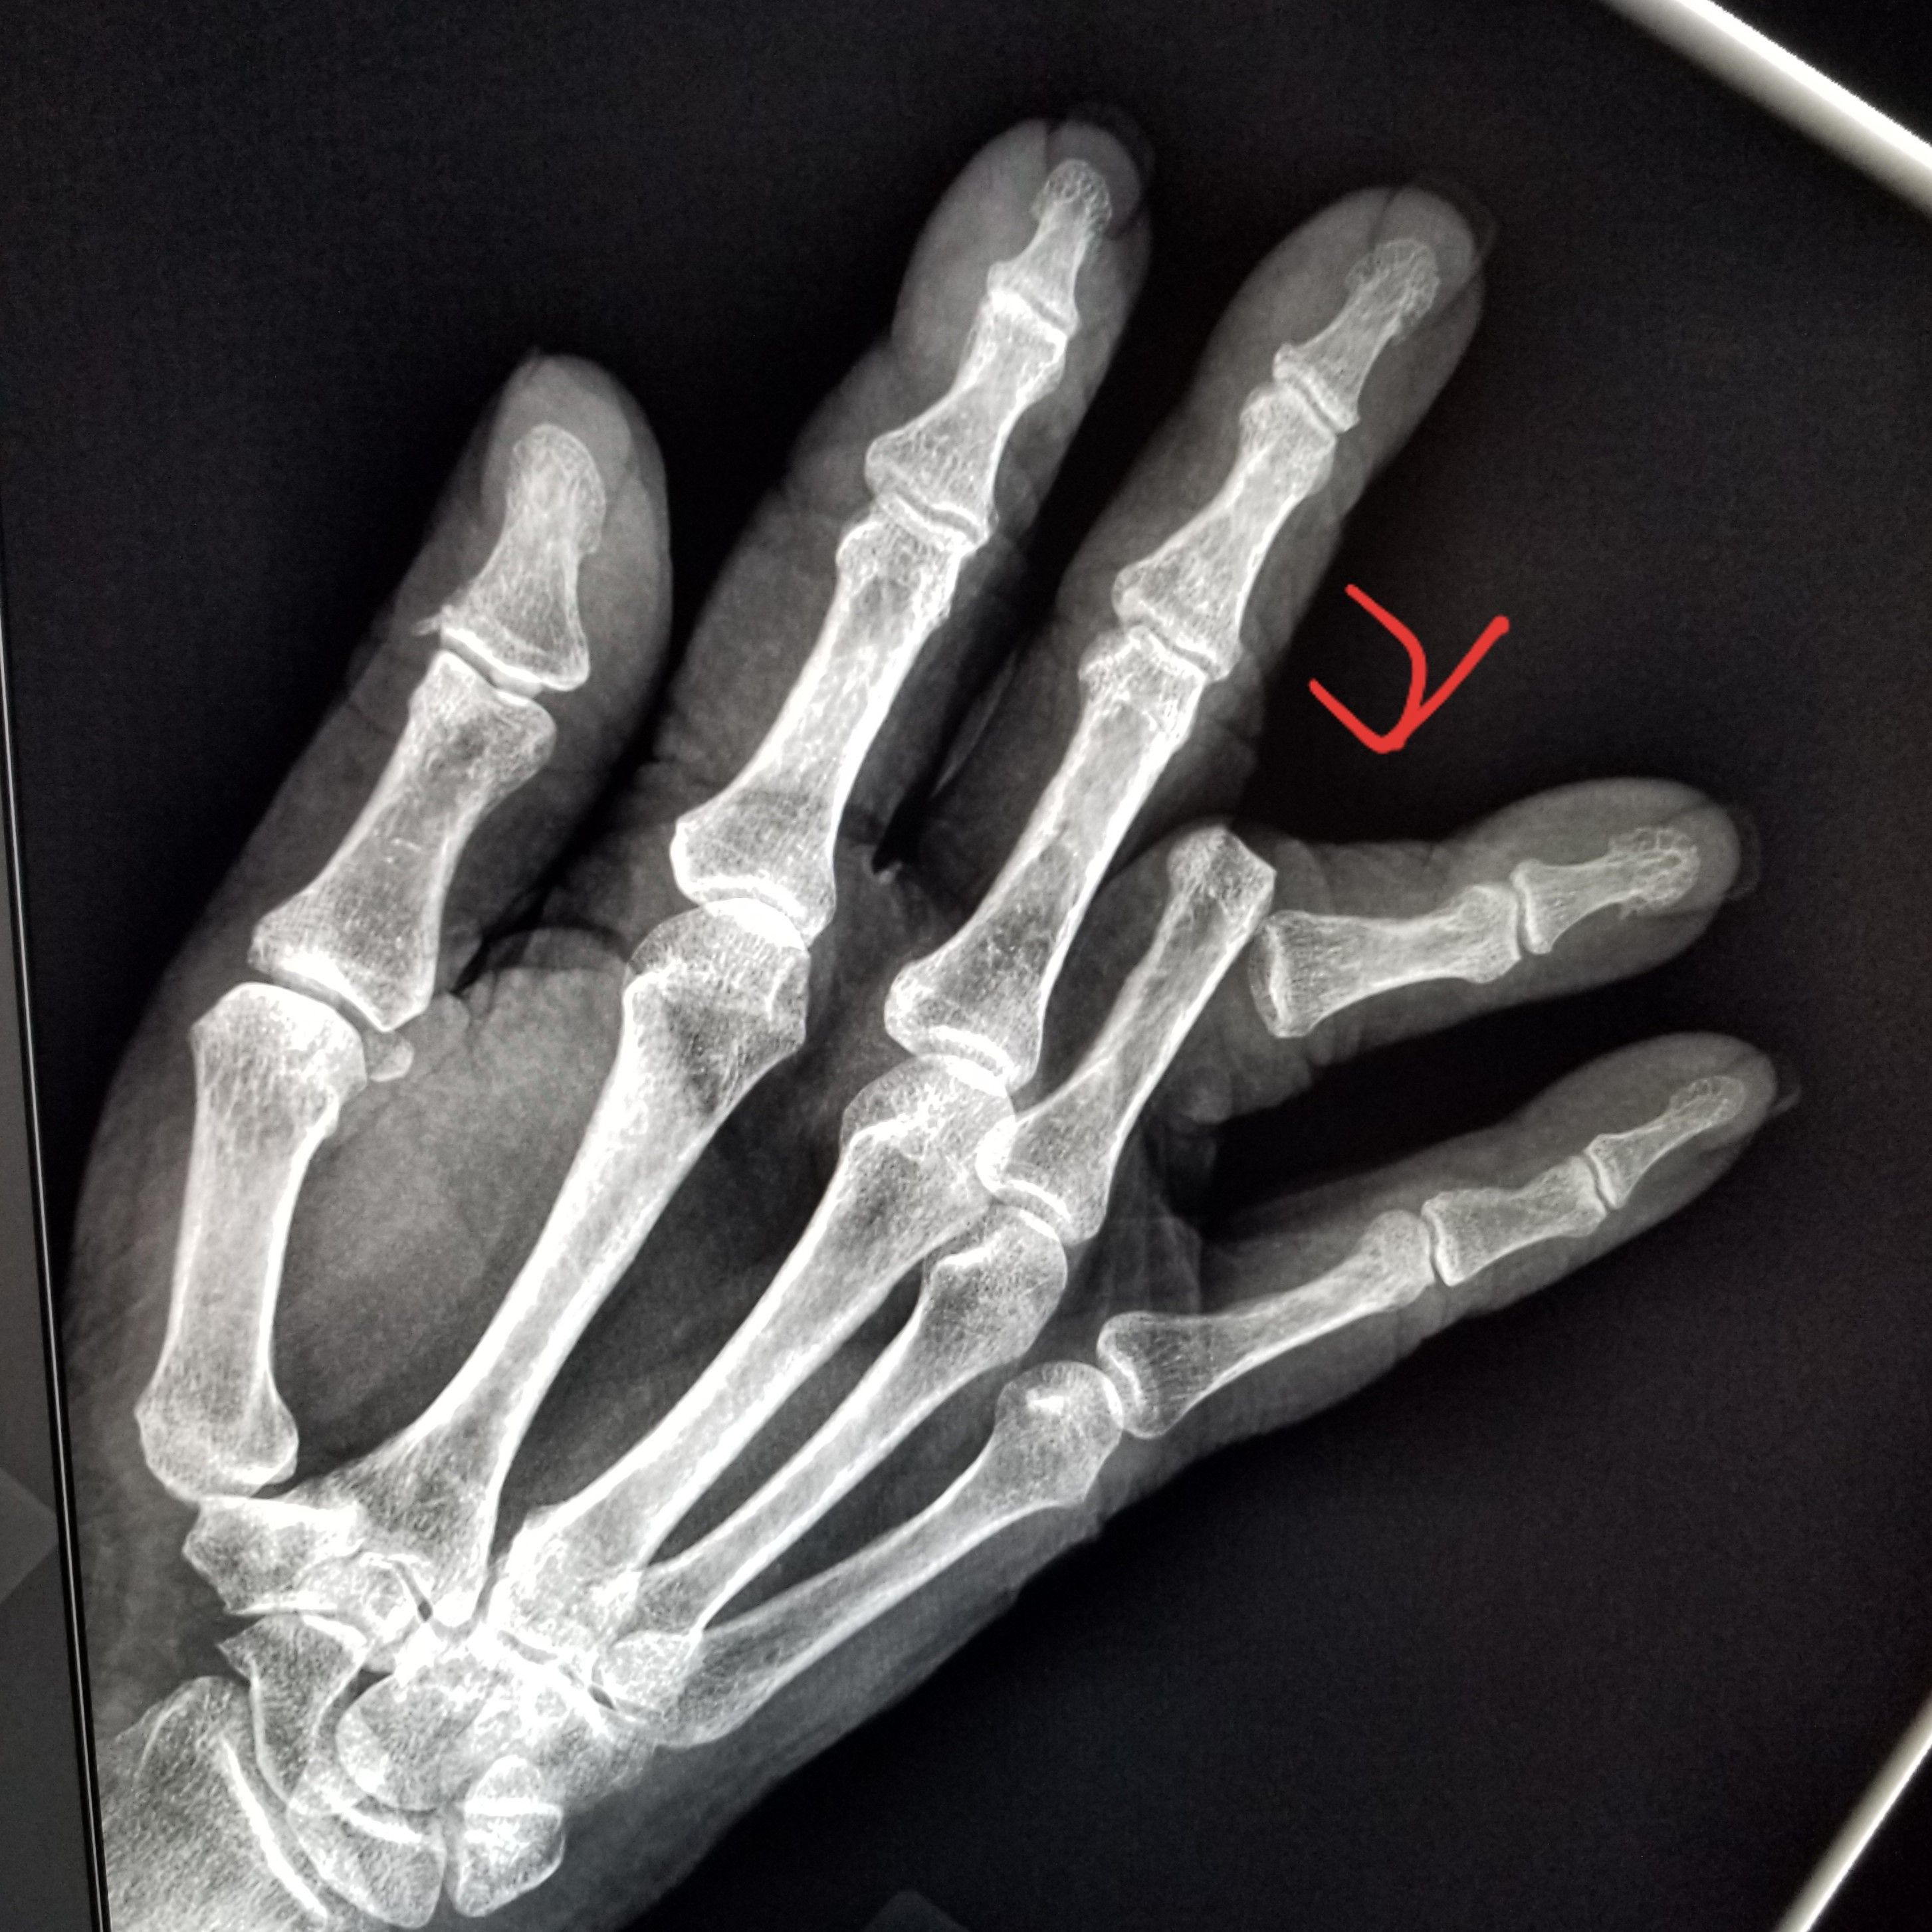

In [17]:
imagefile = "images/image3.jpg"

Image(filename=imagefile, width=512)

In [18]:
results = gpt4V(imagefile, "What do you see?")
view_results()


[Answer] This is a radiograph of a human hand. The red arrow appears to be pointing to a subtle discontinuity in the cortex of the fourth metacarpal bone, possibly indicating a fracture. There is no significant displacement visible. The surrounding soft tissue and other visible bones do not show obvious abnormalities in this single view. Clinical correlation is recommended for further evaluation and management.

[Note] These results are produced by an AI and should be verified by a medical professional.
06-Feb-2024 16:05:51 Powered by Azure OpenAI GPT-4 Turbo with vision model

Full results:


{'id': 'chatcmpl-8pIEz2ecMlCi0DqyOh1pJMILA170e',
 'object': 'chat.completion',
 'created': 1707235537,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': 'This is a radiograph of a human hand. The red arrow appears to be pointing to a subtle discontinuity in the cortex of the fourth metacarpal bone, possibly indicating a fracture. There is no significant displacement visible. The surrounding soft tissue and other visible bones do not show obvious abnormalities in this single view. Clinical correlation is recommended for further evaluation and management.'},
   'content_filter_results'

## Another example

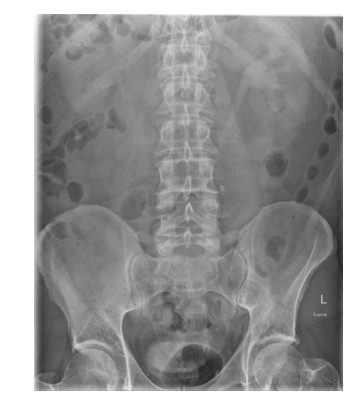

In [19]:
imagefile = "images/image4.jpg"

Image(filename=imagefile, width=512)

In [20]:
results = gpt4V(imagefile, "What do you see?")
view_results()


[Answer] The image provided appears to be an X-ray of the lower abdomen and pelvis. Visible are the lumbar spine, pelvis, and femoral heads. The lumbar spine shows vertebral bodies with intact pedicles, spinous processes, and intervertebral disc spaces. There are no obvious fractures, dislocations, or significant bony degenerative changes.

The pelvic bones including the iliac wings, pubic rami, ischium, and acetabulum appear intact with no evident fractures or lesions. Both femoral heads are in alignment with the acetabulum, and there are no signs of dislocation.

There are multiple round opacities of varying sizes throughout the image, which could represent phleboliths or calcifications within the soft tissue. Phleboliths are typically benign, calcified blood clots found in the pelvis and are a common incidental finding.

In the abdomen, there are scattered air-filled bowel loops without evidence of bowel obstruction or free air under the diaphragm.

Please note that this is a basic

{'id': 'chatcmpl-8pIFGkeoFDMilQlPQo3H3K63m24oX',
 'object': 'chat.completion',
 'created': 1707235554,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': "The image provided appears to be an X-ray of the lower abdomen and pelvis. Visible are the lumbar spine, pelvis, and femoral heads. The lumbar spine shows vertebral bodies with intact pedicles, spinous processes, and intervertebral disc spaces. There are no obvious fractures, dislocations, or significant bony degenerative changes.\n\nThe pelvic bones including the iliac wings, pubic rami, ischium, and acetabulum appear intact with n

## Another example

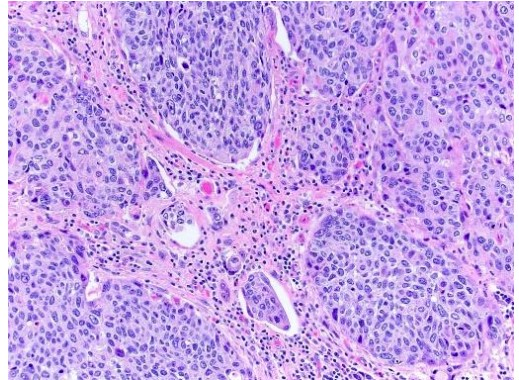

In [21]:
imagefile = "images/image5.jpg"

Image(filename=imagefile, width=640)

In [22]:
results = gpt4V(imagefile, "What is it?")
view_results()


[Answer] The image provided appears to be a photomicrograph from a histological tissue sample stained with Hematoxylin and Eosin (H&E). This type of staining is commonly used to visualize the architecture and cellular details of tissues in medical diagnostics.

The tissue shown here seems to have a variety of cells with different sizes and shapes, suggesting it is likely to be a sample from a heterogeneous tissue such as a tumor. There are several large cells with prominent nucleoli and a high nucleus-to-cytoplasm ratio, features that are often associated with malignancy. Additionally, the presence of irregularly shaped vascular structures and a certain degree of cellularity also support the possibility of a neoplastic process.

However, without clinical context and additional details such as magnification level, and specific location from which the sample was taken, it is challenging to provide a definitive interpretation or diagnosis. A comprehensive analysis including clinical corr

{'id': 'chatcmpl-8pIFbnuKoiRxENU02yKah10RbbTmB',
 'object': 'chat.completion',
 'created': 1707235575,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': 'The image provided appears to be a photomicrograph from a histological tissue sample stained with Hematoxylin and Eosin (H&E). This type of staining is commonly used to visualize the architecture and cellular details of tissues in medical diagnostics.\n\nThe tissue shown here seems to have a variety of cells with different sizes and shapes, suggesting it is likely to be a sample from a heterogeneous tissue such as a tumor. There are

## Another example

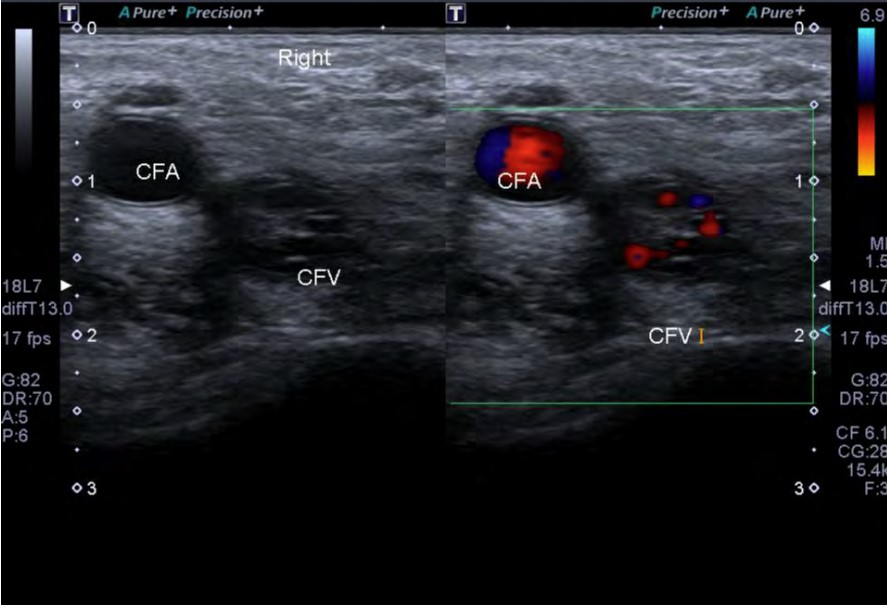

In [23]:
imagefile = "images/image6.jpg"

Image(filename=imagefile, width=640)

In [24]:
results = gpt4V(imagefile, "What do you see?")
view_results()


[Answer] The image provided is a split-screen view of a duplex ultrasound of vascular structures, with the left side of the screen showing a grayscale image and the right side showing a color Doppler image.

On the left side of the image:
- The Common Femoral Artery (CFA) and the Common Femoral Vein (CFV) are labeled. The CFA appears as an anechoic (dark) circular area, typical of vessels in grayscale ultrasound imaging. The CFV is also visualized as an anechoic structure adjacent to the artery. The surrounding tissue has various shades of gray indicating different tissue densities.

On the right side of the image:
- The use of color Doppler allows for the assessment of blood flow within the vessels. The Common Femoral Artery (CFA) is visualized with red color indicating blood flow towards the transducer, and the Common Femoral Vein (CFV) shows blue color indicating blood flow away from the transducer. The color Doppler helps in differentiating the artery from the vein and in assessin

{'id': 'chatcmpl-8pIGEWCYQw5T1YiCVYCPGirXY7nQT',
 'object': 'chat.completion',
 'created': 1707235614,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': 'The image provided is a split-screen view of a duplex ultrasound of vascular structures, with the left side of the screen showing a grayscale image and the right side showing a color Doppler image.\n\nOn the left side of the image:\n- The Common Femoral Artery (CFA) and the Common Femoral Vein (CFV) are labeled. The CFA appears as an anechoic (dark) circular area, typical of vessels in grayscale ultrasound imaging. The CFV is also v

## Another example

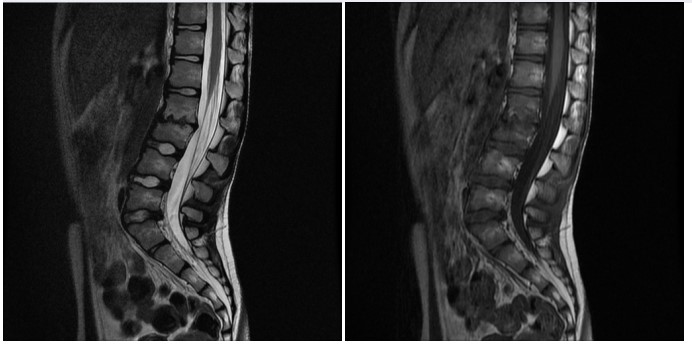

In [25]:
imagefile = "images/image7.jpg"

Image(filename=imagefile, width=860)

In [26]:
results = gpt4V(
    imagefile,
    "These are the MRI images of a 10-year-old female patient, with low back pain x1 year.\
Persistent pain despite completing treatment. What's the abnormal region in the image?",
)
view_results()


[Answer] The MRI images presented are sagittal views of the lumbar spine. Upon visual assessment of the images, there is an abnormal signal intensity in the region of the lower lumbar vertebrae. Specifically, the vertebrae at L5-S1 level appear to have a decrease in the height of the intervertebral disc and loss of the normal bright signal on the T2-weighted image, which is commonly indicative of degenerative disc disease. Additionally, there appears to be a posterior disc protrusion or herniation at the same level.

This finding could potentially explain the patient's persistent low back pain despite treatment. However, to provide a definitive interpretation and to guide further management, a thorough clinical correlation by the reviewing doctor is essential, including potentially correlating with further imaging or clinical tests as appropriate.

[Note] These results are produced by an AI and should be verified by a medical professional.
06-Feb-2024 16:07:27 Powered by Azure OpenAI 

{'id': 'chatcmpl-8pIGWbDeMtPNybTIgAL5R9QfdiDKK',
 'object': 'chat.completion',
 'created': 1707235632,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': "The MRI images presented are sagittal views of the lumbar spine. Upon visual assessment of the images, there is an abnormal signal intensity in the region of the lower lumbar vertebrae. Specifically, the vertebrae at L5-S1 level appear to have a decrease in the height of the intervertebral disc and loss of the normal bright signal on the T2-weighted image, which is commonly indicative of degenerative disc disease. Additionally, ther

## Another example

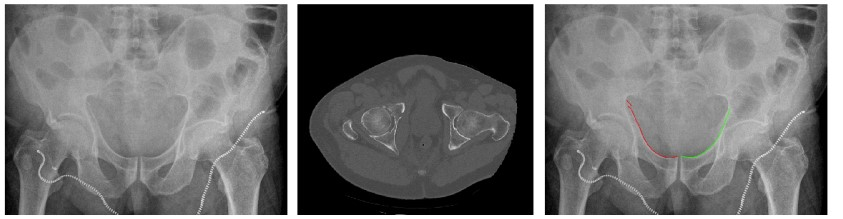

In [27]:
imagefile = "images/image8.jpg"

Image(filename=imagefile, width=1024)

In [28]:
results = gpt4V(imagefile, "What do you see?")
view_results()


[Answer] The images provided appear to be radiographic images of the pelvic area.

The first and third images are X-rays. They show the pelvic bones, including the iliac crests, pubic rami, and acetabuli. The bones appear to be intact with no visible fractures or dislocations. The hip joints also appear preserved without any obvious degenerative changes. The alignment of the pelvic ring seems normal without signs of disruption.

The second image is a CT scan cross-section at the level of the acetabula, showing the bony structures with more detail than an X-ray. This image provides a better view of the hip joints, the acetabular regions, and the proximal femora. Again, there are no obvious fractures or dislocations.

There are colored lines on the third image, with the green line outlining the right side of the pubic symphysis and the red line outlining the left side. These lines highlight the symmetry of the pubic rami, which appears to be well-maintained.

Remember that while the ima

{'id': 'chatcmpl-8pIGpjlx1m3FSBJz4zbgRWNaqiRZZ',
 'object': 'chat.completion',
 'created': 1707235651,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': "The images provided appear to be radiographic images of the pelvic area.\n\nThe first and third images are X-rays. They show the pelvic bones, including the iliac crests, pubic rami, and acetabuli. The bones appear to be intact with no visible fractures or dislocations. The hip joints also appear preserved without any obvious degenerative changes. The alignment of the pelvic ring seems normal without signs of disruption.\n\nThe seco

## Another example

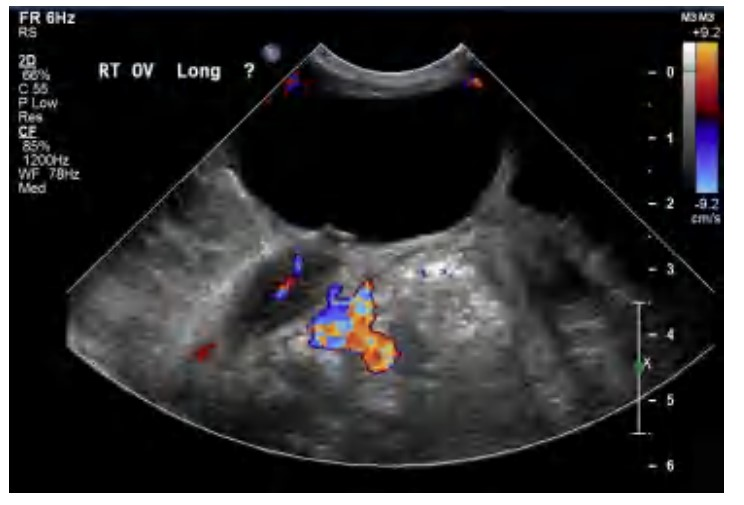

In [29]:
imagefile = "images/image9.jpg"

Image(filename=imagefile, width=640)

In [30]:
results = gpt4V(imagefile, "Generate a report on this scan.")
view_results()


[Answer] This ultrasound image appears to be of the right ovary (RT OV), depicted in a longitudinal orientation as indicated by the label "Long". The presence of color doppler flow indicates vascularity within the structure visualized in the center of the image. The color doppler helps to differentiate between solid and cystic areas by showing blood flow, which is typically absent in simple cystic structures. 

The heterogeneous echo texture of the tissue and the presence of vascularity suggest a solid component or complex nature of the ovarian structure, which could be related to a variety of conditions ranging from benign to malignant. The exact nature of the lesion would require correlation with clinical findings, patient history, and potentially further imaging or laboratory tests.

Note: It's essential to interpret these findings in conjunction with clinical data for accurate diagnosis, and follow-up may be required to monitor changes over time or response to treatment if applica

{'id': 'chatcmpl-8pIH3PFOlAlWLshA9rL8hvGnO3AHw',
 'object': 'chat.completion',
 'created': 1707235665,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': 'This ultrasound image appears to be of the right ovary (RT OV), depicted in a longitudinal orientation as indicated by the label "Long". The presence of color doppler flow indicates vascularity within the structure visualized in the center of the image. The color doppler helps to differentiate between solid and cystic areas by showing blood flow, which is typically absent in simple cystic structures. \n\nThe heterogeneous echo textu

## Another example

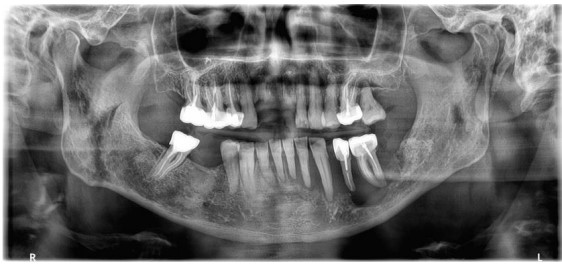

In [31]:
imagefile = "images/image10.jpg"

Image(filename=imagefile, width=640)

In [32]:
results = gpt4V(imagefile, "What do you see?")
view_results()


[Answer] The image provided is a panoramic dental X-ray. This type of X-ray gives a broad overview of the entire mouth, including the teeth, upper and lower jaws, surrounding structures, and tissues. 

Here are the notable observations:

1. There are multiple missing teeth. 
2. The remaining teeth show varying degrees of dental restoration work, including fillings and crowns. 
3. There is a presence of dental implants (visible as small rod-like structures in the jaw bone).
4. The lower right third molar (wisdom tooth) is impacted and has an abnormal position, with its crown angling towards the second molar.
5. There are retained roots seen - possibly the lower left second molar.
6. Some bone loss in the jaw can be observed, which is consistent with a history of periodontal disease or could be due to the missing teeth.
7. There are no obvious signs of gross pathology like large cysts or tumors in the jaws within the resolution and scope of this X-ray.

Please be reminded that this anal

{'id': 'chatcmpl-8pIHHhwKjBZj3IrVz8nrI0416bmHJ',
 'object': 'chat.completion',
 'created': 1707235679,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': "The image provided is a panoramic dental X-ray. This type of X-ray gives a broad overview of the entire mouth, including the teeth, upper and lower jaws, surrounding structures, and tissues. \n\nHere are the notable observations:\n\n1. There are multiple missing teeth. \n2. The remaining teeth show varying degrees of dental restoration work, including fillings and crowns. \n3. There is a presence of dental implants (visible as small

## Another example

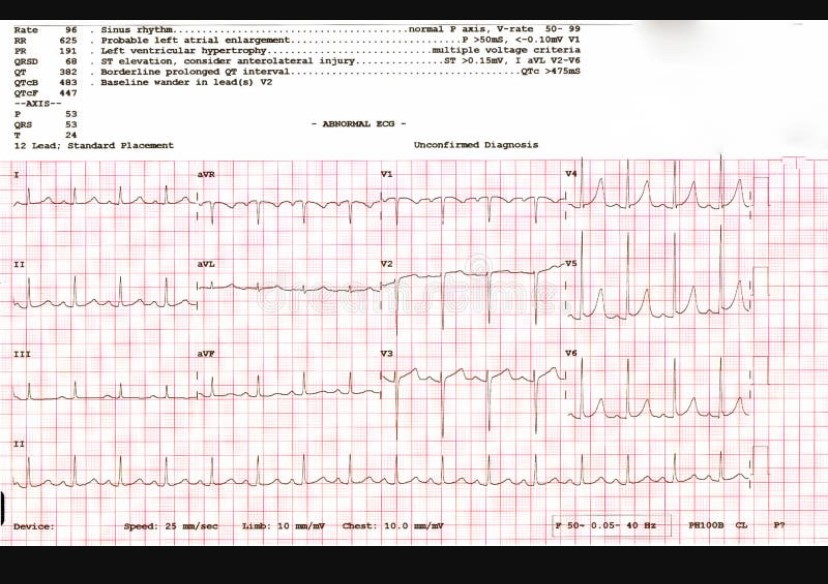

In [33]:
imagefile = "images/image11.jpg"

Image(filename=imagefile, width=860)

In [34]:
results = gpt4V(imagefile, "Please diagnose this image.")
view_results()


[Answer] This ECG tracing shows several findings:

1. The heart rate is 96 beats per minute.
2. The rhythm is sinus rhythm, which means that the electrical activity is originating from the sinoatrial node in a regular manner.
3. There is probable left atrial enlargement, which can be inferred from the abnormal P wave morphology.
4. There is evidence of left ventricular hypertrophy, which is suggested by the high R wave amplitude in the left-sided leads and the deep S wave in the right-sided leads.
5. The QT interval appears to be borderline prolonged.
6. There is baseline wander in lead V2, which may be due to patient movement or other technical issues during the recording.
7. The QRS axis is normal.

Overall, the ECG suggests left atrial enlargement and left ventricular hypertrophy, which may indicate chronic pressure overload of the left heart such as from hypertension or aortic valve disease. However, clinical correlation with patient history, symptoms, and further diagnostic testi

{'id': 'chatcmpl-8pIHZ4HOK1qjsiSOW03iac1g8iRy4',
 'object': 'chat.completion',
 'created': 1707235697,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': 'This ECG tracing shows several findings:\n\n1. The heart rate is 96 beats per minute.\n2. The rhythm is sinus rhythm, which means that the electrical activity is originating from the sinoatrial node in a regular manner.\n3. There is probable left atrial enlargement, which can be inferred from the abnormal P wave morphology.\n4. There is evidence of left ventricular hypertrophy, which is suggested by the high R wave amplitude in the 

## Another example

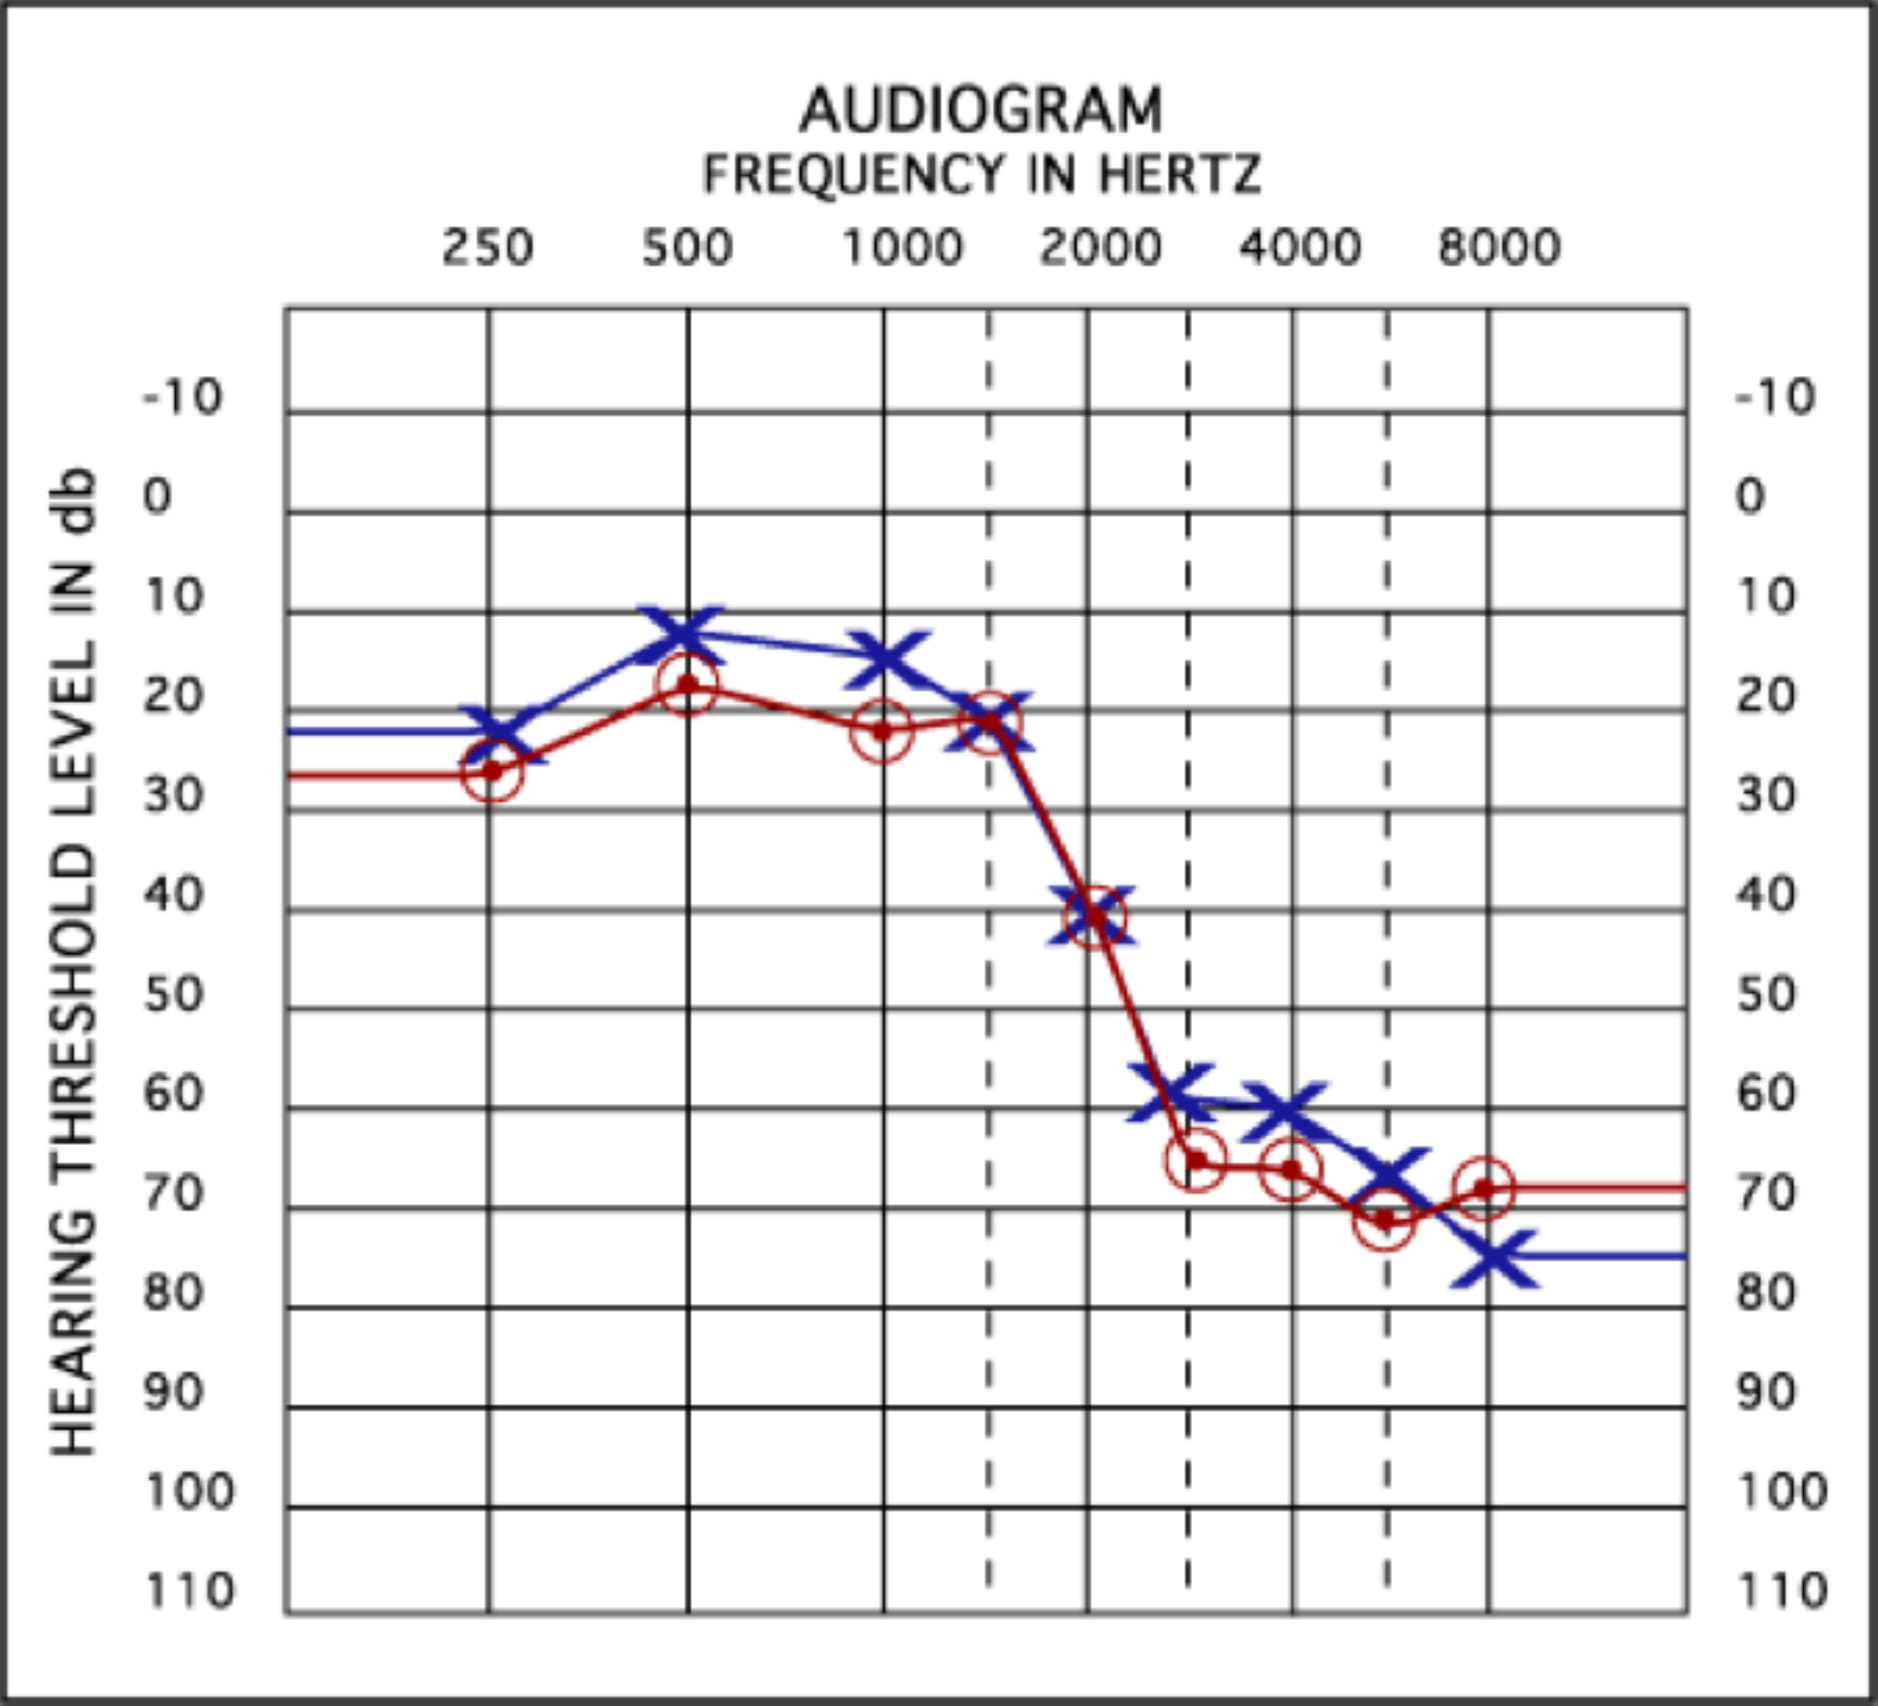

In [35]:
imagefile = "images/image12.jpg"

Image(filename=imagefile, width=480)

In [36]:
results = gpt4V(imagefile, "Please diagnose this image.")
view_results()


[Answer] The image provided is an audiogram, which is a graph that shows the results of a pure-tone hearing test. It plots the threshold of hearing at various frequencies measured in Hertz (Hz) on the horizontal axis, and the intensity required for the sound to be heard by the individual, measured in decibels (dB), on the vertical axis.

The audiogram displays two lines with different symbols, typically indicating the hearing thresholds for the right ear (marked with a red line and a circle or triangle) and the left ear (marked with a blue line and an "X" or a square).

In the provided audiogram, both the red and blue lines begin around 10 dB at 250 Hz, which is within the range of normal hearing. The thresholds increase slightly in the lower frequencies, then increase significantly at higher frequencies, particularly beyond 2000 Hz. The pattern of hearing loss is most prominent at 8000 Hz, where the hearing thresholds for both ears rise to 60 dB, indicating a steeply sloping high-fre

{'id': 'chatcmpl-8pIHvrMxBbyhlQGJk6UTmoFgdMfFe',
 'object': 'chat.completion',
 'created': 1707235719,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': 'The image provided is an audiogram, which is a graph that shows the results of a pure-tone hearing test. It plots the threshold of hearing at various frequencies measured in Hertz (Hz) on the horizontal axis, and the intensity required for the sound to be heard by the individual, measured in decibels (dB), on the vertical axis.\n\nThe audiogram displays two lines with different symbols, typically indicating the hearing thresholds fo

## Another example

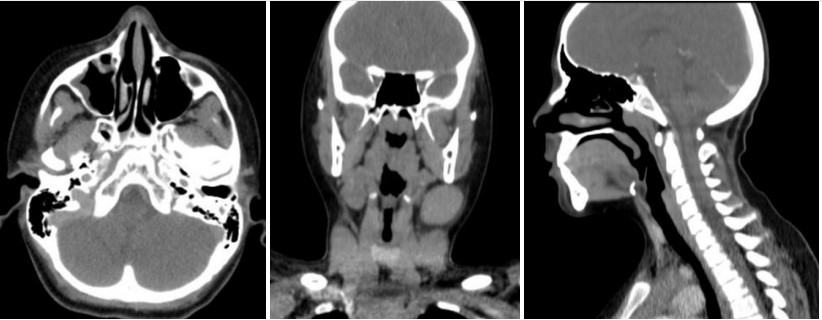

In [37]:
imagefile = "images/image13.jpg"

Image(filename=imagefile, width=860)

In [38]:
results = gpt4V(imagefile, "What do you see?")
view_results()


[Answer] The images provided appear to be CT scans of the head and neck region.

1. The first image (left) is an axial CT scan at the level of the middle cranial fossa, revealing the temporal bones, mastoid air cells, and the cerebellum. There is no obvious abnormality in the visible structures at this level.

2. The second image (middle) is a coronal CT scan through the sinuses and orbits. This image demonstrates the frontal sinuses, maxillary sinuses, ethmoid air cells, orbits, and nasal passages. There appears to be no evidence of sinus opacification or mass effect.

3. The third image (right) is a sagittal CT scan through the midline of the head and neck. It shows the nasal passages, mouth, oropharynx, larynx, cervical vertebrae, and some of the brain including the frontal lobes and cerebellum. This view also does not demonstrate any obvious pathology.

In summary, the CT scans appear unremarkable based on the slices provided, with no evident masses, lesions, or abnormalities. It 

{'id': 'chatcmpl-8pIICk6Vk8HAfbaROEUEMM7S8HRP6',
 'object': 'chat.completion',
 'created': 1707235736,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': 'The images provided appear to be CT scans of the head and neck region.\n\n1. The first image (left) is an axial CT scan at the level of the middle cranial fossa, revealing the temporal bones, mastoid air cells, and the cerebellum. There is no obvious abnormality in the visible structures at this level.\n\n2. The second image (middle) is a coronal CT scan through the sinuses and orbits. This image demonstrates the frontal sinuses, ma

## Another example

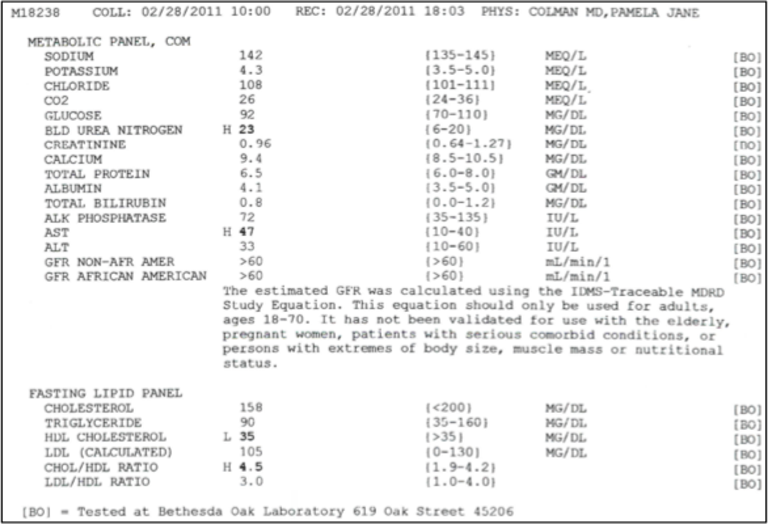

In [45]:
imagefile = "images/image14.png"

Image(filename=imagefile, width=640)

In [46]:
results = gpt4V(imagefile, "What do you see?")
view_results()


[Answer] The image appears to be a laboratory report containing results from a metabolic panel and a fasting lipid panel. Here are the details visible in the report:

**METABOLIC PANEL, COM**
- SODIUM: 142 MEQ/L (Normal range: 135-145 MEQ/L)
- POTASSIUM: 4.3 MEQ/L (Normal range: 3.5-5.0 MEQ/L)
- CHLORIDE: 108 MEQ/L (Normal range: 101-111 MEQ/L)
- CO2: 26 MMOL/L (Normal range: 24-36 MMOL/L)
- GLUCOSE: 92 MG/DL (Normal range: 70-110 MG/DL)
- BLD UREA NITROGEN: High at 23 MG/DL (Normal range: 6-24 MG/DL)
- CREATININE: 0.96 MG/DL (Normal range: 0.64-1.27 MG/DL)
- CALCIUM: 9.4 MG/DL (Normal range: 8.5-10.5 MG/DL)
- TOTAL PROTEIN: 6.5 GM/DL (Normal range: 6.5-8.0 GM/DL)
- ALBUMIN: 4.1 GM/DL (Normal range: 3.5-5.0 GM/DL)
- TOTAL BILIRUBIN: 0.8 MG/DL (Normal range: 0.0-1.2 MG/DL)
- ALK PHOSPHATASE: 72 IU/L (Normal range: 35-135 IU/L)
- AST: 47 IU/L (Normal range: 10-40 IU/L) Elevated
- ALT: 33 IU/L (Normal range: 10-60 IU/L)
- GFR NON-AFR AMER: >60 ML/MIN/1 (Normal: >60 ML/MIN/1)
- GFR AFRICA

{'id': 'chatcmpl-8pIKR56KTx6bkYMKnzHLalom17egA',
 'object': 'chat.completion',
 'created': 1707235875,
 'model': 'gpt-4',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'choices': [{'finish_details': {'type': 'stop', 'stop': '<|fim_suffix|>'},
   'index': 0,
   'message': {'role': 'assistant',
    'content': 'The image appears to be a laboratory report containing results from a metabolic panel and a fasting lipid panel. Here are the details visible in the report:\n\n**METABOLIC PANEL, COM**\n- SODIUM: 142 MEQ/L (Normal range: 135-145 MEQ/L)\n- POTASSIUM: 4.3 MEQ/L (Normal range: 3.5-5.0 MEQ/L)\n- CHLORIDE: 108 MEQ/L (Normal range: 101-111 MEQ/L)\n- CO2: 26 MMOL/L (Normal range: 24-36 MMOL/L)\n- GLUCOSE: 92 MG/DL (Normal range: 70-110 MG/

> End